In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

torch.__version__

'2.0.1'

In [2]:
w = 0.7
b = 0.3

X = torch.arange(0, 1, 0.02).unsqueeze(1)
y = w * X + b

X[:5], y[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]]))

In [3]:
X.shape

torch.Size([50, 1])

In [4]:
train_length = int(X.shape[0] * 0.8)
X_train, y_train = X[:train_length], y[:train_length]
X_test, y_test = X[train_length:], y[train_length:]


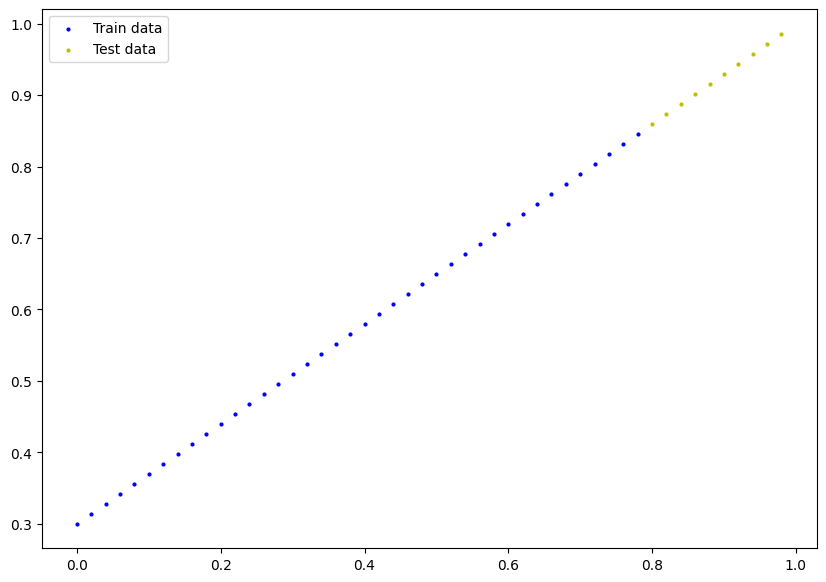

In [5]:
def plot_predictions(train_data=X_train, train_labels=y_train, test_data=X_test, test_labels=y_test, predictions=None):
    plt.figure(figsize=(10, 7))
    plt.scatter(train_data, train_labels, c="b", s=4, label = "Train data")
    plt.scatter(test_data, test_labels, c="y", s=4, label = "Test data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c="g", s=4, label = "Predictions")
    
    plt.legend()

plot_predictions()

In [6]:
class LinRegModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.weight * x + self.bias


In [7]:
#set manual seed
torch.manual_seed(42)

model = LinRegModel()

list(model.parameters())
model.state_dict()


OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [8]:
with torch.inference_mode():
    y_preds = model(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

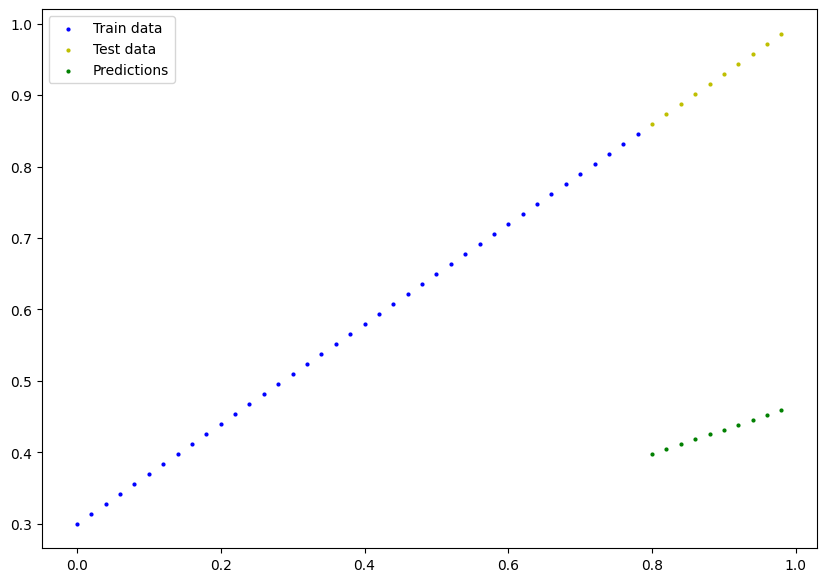

In [9]:
plot_predictions(predictions=y_preds)

In [10]:
loss_fn = nn.L1Loss()

optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)


In [11]:
epochs = 200

epoch_count = []
loss_vals = []
test_loss_vals = []



for epoch in range(epochs+1):
    model.train()
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    optimizer.zero_grad()
    #print(f"loss: {loss}")
    #print(f"state: {model.state_dict()}")
    loss.backward()
    optimizer.step()

    model.eval()
    with torch.inference_mode():
        test_pred = model(X_test)
        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch}, Loss: {loss}, Test Loss: {test_loss}")
        epoch_count.append(epoch)
        loss_vals.append(loss)
        test_loss_vals.append(test_loss)


print(model.state_dict())



Epoch: 0, Loss: 0.31288138031959534, Test Loss: 0.48106518387794495
Epoch: 10, Loss: 0.1976713240146637, Test Loss: 0.3463551998138428
Epoch: 20, Loss: 0.08908725529909134, Test Loss: 0.21729660034179688
Epoch: 30, Loss: 0.053148526698350906, Test Loss: 0.14464017748832703
Epoch: 40, Loss: 0.04543796554207802, Test Loss: 0.11360953003168106
Epoch: 50, Loss: 0.04167863354086876, Test Loss: 0.09919948130846024
Epoch: 60, Loss: 0.03818932920694351, Test Loss: 0.08886633068323135
Epoch: 70, Loss: 0.03476089984178543, Test Loss: 0.0805937647819519
Epoch: 80, Loss: 0.03132382780313492, Test Loss: 0.07232122868299484
Epoch: 90, Loss: 0.02788740023970604, Test Loss: 0.06473556160926819
Epoch: 100, Loss: 0.024458957836031914, Test Loss: 0.05646304413676262
Epoch: 110, Loss: 0.021020209416747093, Test Loss: 0.04819049686193466
Epoch: 120, Loss: 0.01758546754717827, Test Loss: 0.04060482233762741
Epoch: 130, Loss: 0.014155392535030842, Test Loss: 0.03233227878808975
Epoch: 140, Loss: 0.0107165882

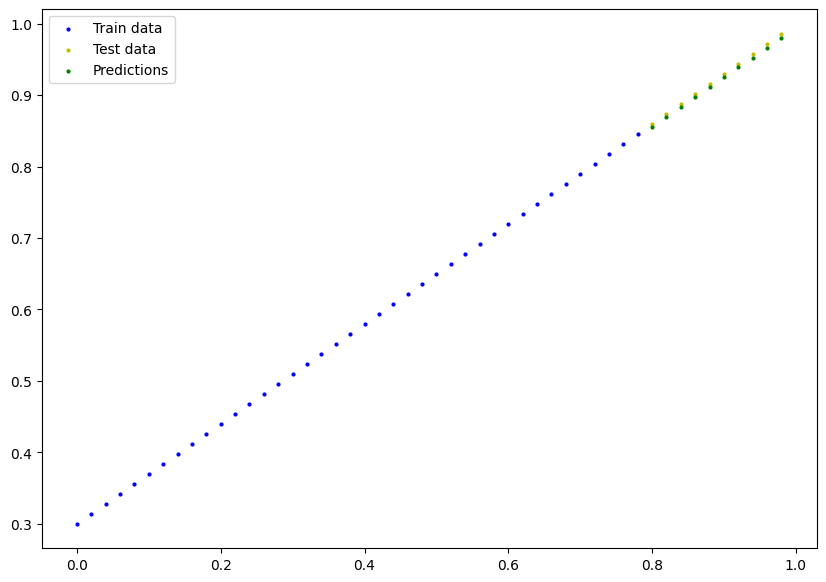

In [12]:
with torch.inference_mode():
    y_preds = model(X_test)

plot_predictions(predictions=y_preds)

21
21
[tensor(0.4811), tensor(0.3464), tensor(0.2173), tensor(0.1446), tensor(0.1136), tensor(0.0992), tensor(0.0889), tensor(0.0806), tensor(0.0723), tensor(0.0647), tensor(0.0565), tensor(0.0482), tensor(0.0406), tensor(0.0323), tensor(0.0241), tensor(0.0165), tensor(0.0082), tensor(0.0050), tensor(0.0050), tensor(0.0050), tensor(0.0050)]


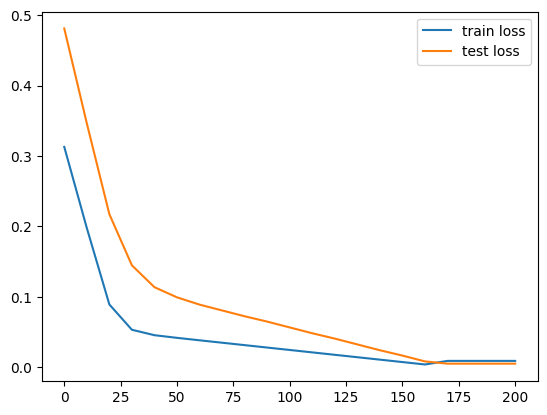

In [13]:
import numpy as np


print(len(test_loss_vals))
print(len(epoch_count))
print(test_loss_vals)
plt.plot(epoch_count, np.array(torch.tensor(loss_vals).numpy()), label="train loss")
plt.plot(epoch_count, test_loss_vals, label="test loss")
plt.legend()



In [14]:

path = "./models/"
model_name = "workflow_lin_reg_model.pth"

save_path = path + model_name
torch.save(obj=model.state_dict(), f=save_path)

In [16]:
loaded_model = LinRegModel()
loaded_model.state_dict()

OrderedDict([('weight', tensor([-1.1229])), ('bias', tensor([-0.1863]))])

In [17]:
loaded_model.load_state_dict(torch.load(save_path))

<All keys matched successfully>

In [18]:
loaded_model.state_dict()

OrderedDict([('weight', tensor([0.6951])), ('bias', tensor([0.2993]))])

In [20]:
load_preds = loaded_model(X_test)
load_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

In [23]:
class LinRegModelV2(nn.Module):
    def __init__(self):
        self.l1 = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.l1(x)

